## <center> Importing Libs

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings 
warnings.filterwarnings('ignore')

## <center> Importing Data

In [73]:
data = pd.read_csv('data/tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**total_bill**: Total bill in dollars including tax \
**tip**: Tip given to waiter in dollars \
**sex**: gender of the person paying the bill \
**smoker**: whether the person smoked or not \
**day**: day of the week \
**time**: lunch or dinner \
**size**: number of people

## <center> Data Info

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [75]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## <center> Null Data / Duplicates

In [76]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [77]:
print(f"Duplicated data: {data.duplicated().sum()}")
print(data[data.duplicated()])

Duplicated data: 1
     total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2


In [78]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop = True)
print(f"Duplicated data after dropping: {data.duplicated().sum()}")

Duplicated data after dropping: 0


## <center> Univariate Analysis

### Who visits the place more often

In [79]:
px.histogram(
    data_frame = data,
    x = 'sex',
    width = 1000, 
    height = 600,
    color = 'sex',
    color_discrete_sequence=['red', "blue"],
    title='Sex distribution'
)

### Distribution of the total bills

<AxesSubplot:ylabel='Density'>

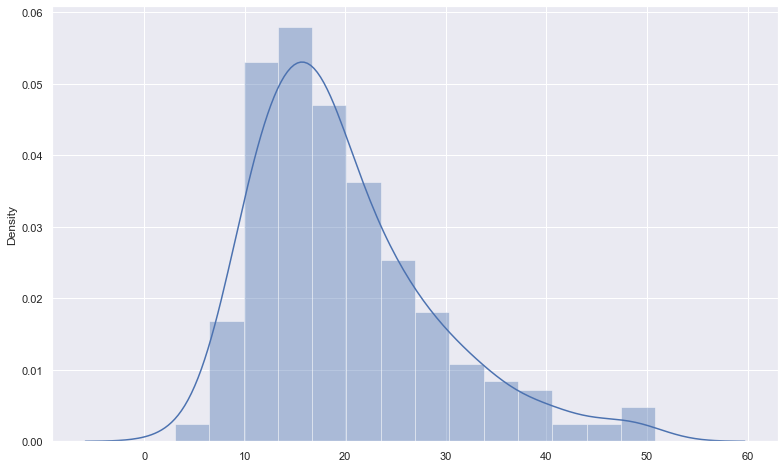

In [80]:
sns.distplot(
    x = data['total_bill']
)

## Distribution of the tips

<AxesSubplot:ylabel='Density'>

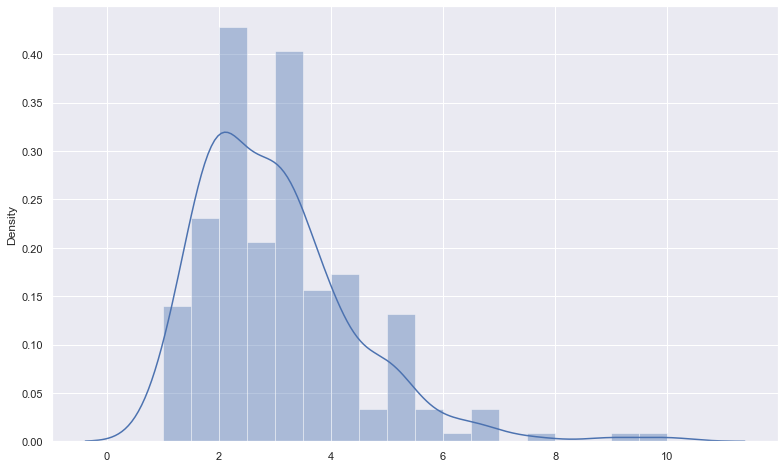

In [81]:
sns.distplot(
    x = data['tip']
)

### What time the place is visited most often

In [82]:
px.histogram(
    data_frame = data,
    x = 'time',
    width = 1000, 
    height = 600,
    color = 'time',
    title='Time distribution'
)

### What day the place is visited most often

<AxesSubplot:xlabel='day', ylabel='count'>

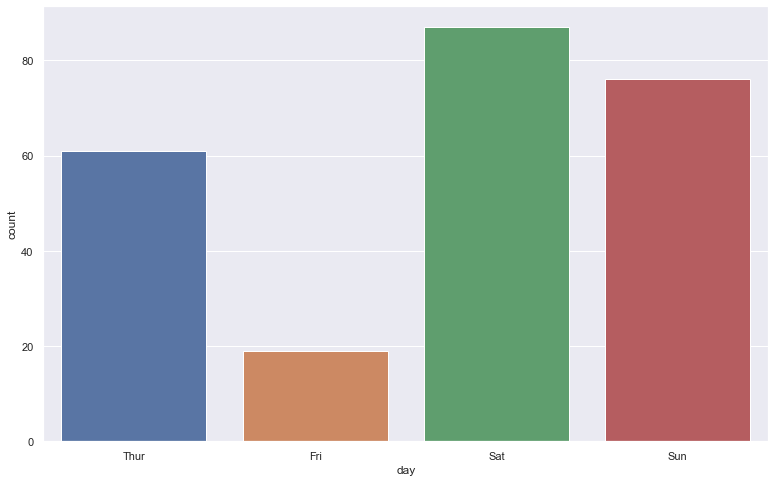

In [83]:
sns.countplot(
    data=data,
    x='day',
    order=['Thur', 'Fri', 'Sat', 'Sun']
)

### Smokers / Non smokers 

<AxesSubplot:xlabel='smoker', ylabel='count'>

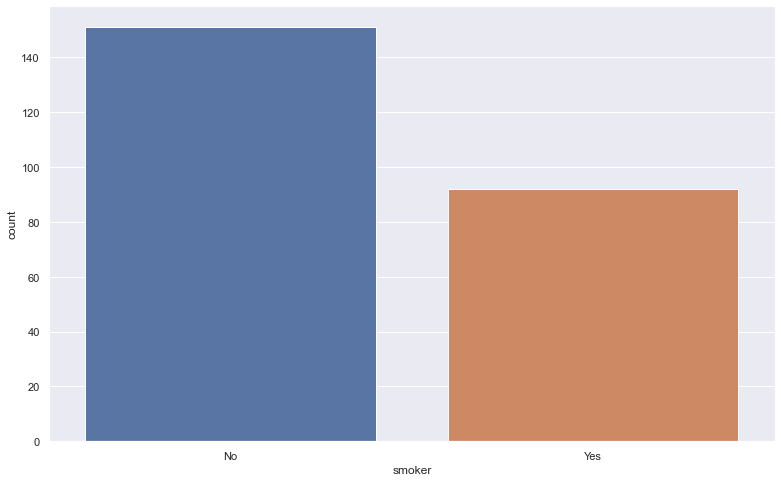

In [84]:
sns.countplot(
    data=data,
    x='smoker'
)

## <center> Multivariate Analysis

### Total bill among sex

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

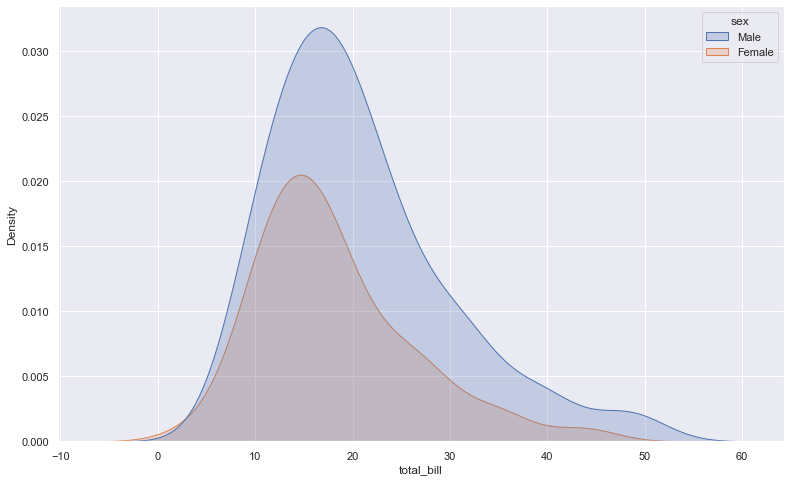

In [85]:
sns.kdeplot(
    x = data['total_bill'], 
    hue= data['sex'],
    fill=True,
    hue_order=['Male', 'Female']
)

### Tips among Sex

<AxesSubplot:xlabel='tip', ylabel='Density'>

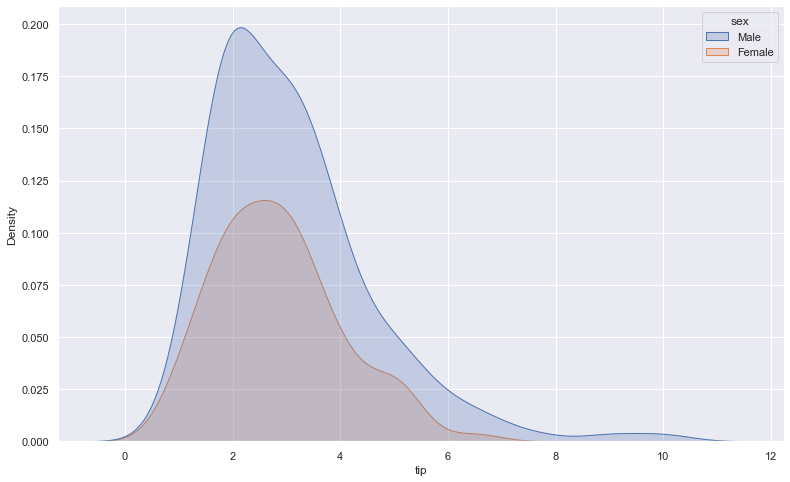

In [86]:
sns.kdeplot(
    x = data['tip'], 
    hue= data['sex'],
    fill=True,
    hue_order=['Male', 'Female']
)

### Smokers / Non smokers among Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

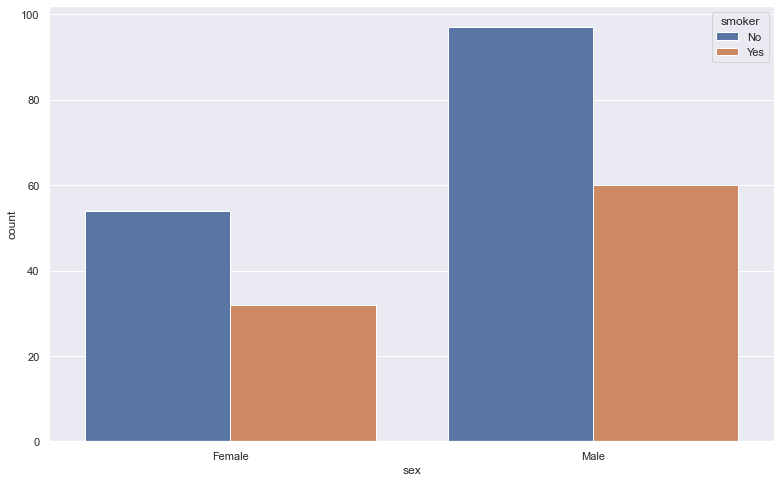

In [87]:
sns.countplot(
    data=data, 
    x = 'sex',
    hue = 'smoker'
)

### Total bill among Day

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

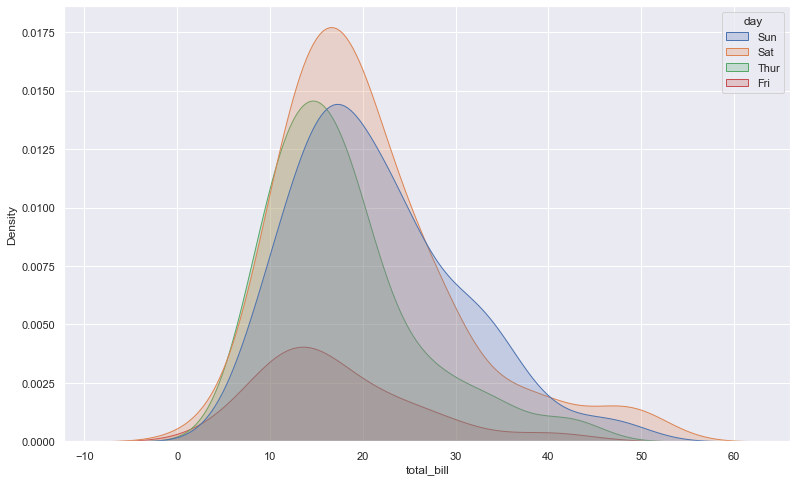

In [88]:
sns.kdeplot(
    x = data['total_bill'], 
    hue= data['day'],
    fill=True
)

As we can see, mean check on weekends is > than mean check on thursday and friday

### Tips among Day

<AxesSubplot:xlabel='tip', ylabel='Density'>

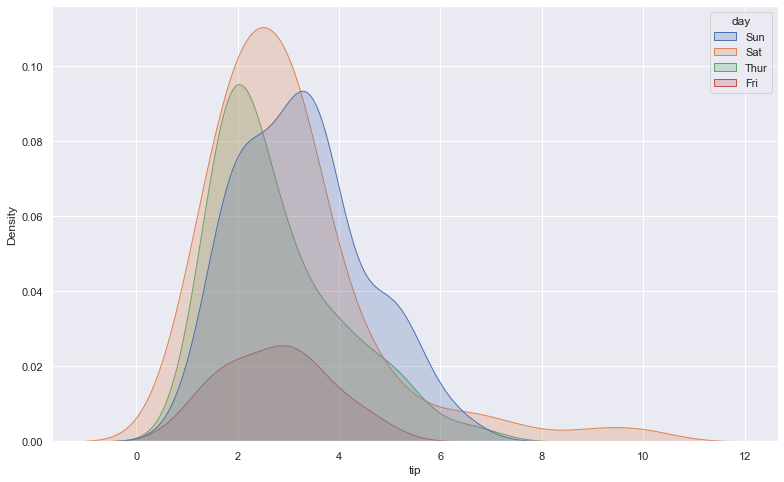

In [89]:
sns.kdeplot(
    x = data['tip'], 
    hue= data['day'],
    fill=True
)

In [90]:
px.scatter(
    x=data['total_bill'],
    y=data['tip'],
    width = 1000, 
    height = 600,
    title='Correlation Tips on Total Bill',
    trendline='ols',
    color=data['sex']
)

## <center> Correlation

<AxesSubplot:>

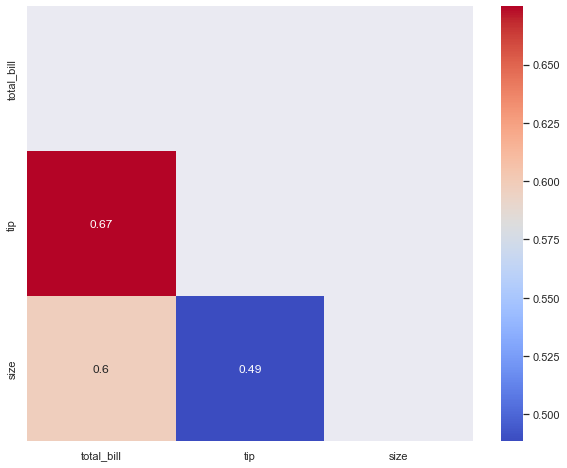

In [91]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(
    data.corr(), 
    mask=mask, 
    cmap='coolwarm', 
    annot = True
)

## <center> Creating X and y variables

In [92]:
X = data[[
    'total_bill',	
    'sex',
    'smoker',
    'day',
    'time',
    'size'
]]

y = data['tip']

print(f"X data shape: {X.shape}")
print(f"y data shape: {y.shape}")

X data shape: (243, 6)
y data shape: (243,)


## <center> Label encoding

In [93]:
encoder = LabelEncoder()

cats = [
    'sex',
    'smoker',
    'day',
    'time'
]

for cat in cats:
    X[cat] = encoder.fit_transform(X[cat])

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


## <center> Dividing into train and test data

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (218, 6)
X_test shape: (25, 6)
y_train shape: (218,)
y_test shape: (25,)


## <center> Modeling

In [95]:
from sklearn.svm import SVR

In [96]:
model = SVR()
model.fit(X_train, y_train)
print(f"Model error: {mean_absolute_percentage_error(y_test, model.predict(X_test))}")

Model error: 0.23982249292807173


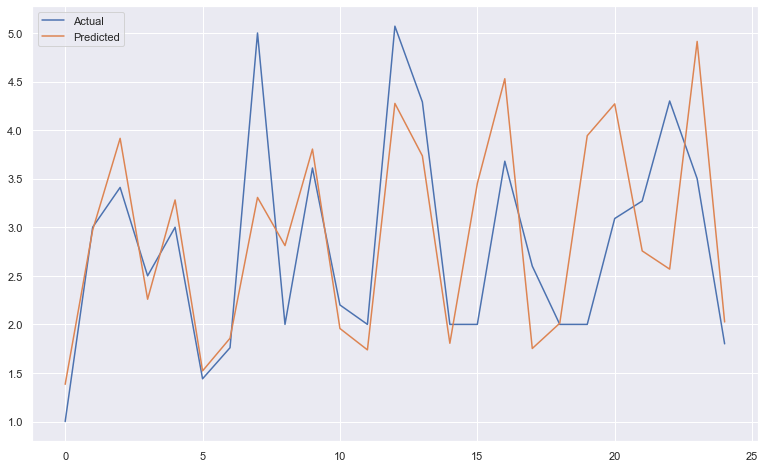

In [105]:
plot_data = pd.DataFrame()
plot_data['Actual'] = y_test
plot_data['Predicted'] = model.predict(X_test)
plot_data.reset_index(inplace=True, drop=True)

plt.plot(plot_data['Actual'], label = 'Actual')
plt.plot(plot_data['Predicted'], label = 'Predicted')
plt.legend()